In [5]:
from statistics import mean, median
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

# Lp norm of two given data
def distance(Class1, Class2, p):
    sum = 0
    size_of_sttribute = len(Class1)
    #print("in dist(), # of attr:", size_of_sttribute)
    for i in range(size_of_sttribute-1):
        sum += math.pow(abs(float(Class1[i])-float(Class2[i])),p)
    for i in range(p-1):
        #print("sqrt once")
        sum = math.sqrt(sum)
    return sum

# x_test is the testing data (unknown class)
# x_train and y_train are training data (feature and class label)
def knn_classifier(x_test, x_train, y_train, k, p):
    dist = [0]*len(x_train)
    # loop through training data and calculate distance
    for i in range(len(x_train)):
        #print(i)
        dist[i] = distance(x_test, x_train[i], p)
    # sort dist
    index = sorted(range(len(dist)), key=lambda _k: dist[_k])
    class2 = 0
    class4 = 0
    # the first k-closest data
    for i in range(k):
        if(x_train[index[i]][9] == '2'):
            class2 += 1
        elif(x_train[index[i]][9] == '4'):
            class4 += 1
        else:
            print("unexpected class")
    # compare which label has more number
    if class2 > class4:
        return '2';
    else:
        return '4';
    print("shouldn't be here")
    return '0'

# use knn_classifier() to label every data point in testing data
# return the accuracy, sensitivity, specitivity through input parameter
# i.e. the 10 accuracy[] result will be extend into the end of list, each represent one result of a k value
def Cross_validation(testing_data, training_data, accuracy, sensitivity, specitivity, p):
    # print("size of testing data=",len(testing_data))
    # print("size of train data=",len(training_data))
    # take class 2 as positive and class 4 as negative
    positive_acc = 0;
    negative_acc = 0;
    positive_all = 0;
    negative_all = 0;
    _accuracy = []
    _sensitivity = []
    _specitivity = []
    #for each k value (for knn)
    for k in range(1,11):
        correct = 0;
        positive_all = 0;
        negative_all = 0;
        positive_acc = 0;
        negative_acc = 0;
        for i in range(len(testing_data)):
            y_pred = knn_classifier(testing_data[i], training_data, training_data, k, p)
            if y_pred == '2' and testing_data[i][9] == '4': # label negative, we predice as positive
                negative_all += 1
            elif y_pred == '4' and testing_data[i][9] == '2': # label positive, we predice as posinegativetive
                positive_all += 1
            elif y_pred == '2' and testing_data[i][9] == '2': # label positive, we predice as positive
                positive_acc += 1
                positive_all += 1
            elif y_pred == '4' and testing_data[i][9] == '4': # label negative, we predice as negative
                negative_acc += 1
                negative_all += 1
            else:
                print("statistic y_pred, something wrong")
        _accuracy.append((positive_acc+negative_acc)/len(testing_data))
        _sensitivity.append(positive_acc/positive_all)
        _specitivity.append(negative_acc/negative_all)
    # by now we have 10 result in _accuracy/_sensitivity/_specitivity
    accuracy.extend(_accuracy)
    sensitivity.extend(_sensitivity)
    specitivity.extend(_specitivity)
    return

fp = open('breast-cancer-wisconsin.data', "r")
index_of_arrtibute = 10
attr_target_list =[]
# this aim to store the average for each attribute, for '?' value
dist = [0]*index_of_arrtibute

i=0
while True:
    data = fp.readline().split(',')
    if data[0] == '\n' or data[0] == '':break
    #print (i,":",data[10])
    i+=1
    context = data[1:10]
    context.append(data[10][0])
    attr_target_list.append(context)
    # sum the attribute value
    for j in range(index_of_arrtibute):
        if context[j] != '?':
            dist[j] += float(context[j])
#end of read file

# auto fill in '?'
dist[:] = [ int(x/len(attr_target_list)) for x in dist]
for i in range(len(attr_target_list)):
    for j in range(len(attr_target_list[0])):
        if attr_target_list[i][j] == '?':
            attr_target_list[i][j] = dist[j]

#print(attr_target_list)
print("size of data point:",len(attr_target_list))
print("size of attribute:",len(attr_target_list[0]))


size of data point: 699
size of attribute: 10


In [6]:
#implement k-nn to last 20% data, training data is top 80%
pivot = int(len(attr_target_list)*0.8)
print("pivot=",pivot)
correct = 0;
for i in range(pivot,len(attr_target_list)):
    y_pred = knn_classifier(attr_target_list[i], attr_target_list[:pivot],attr_target_list[:pivot], 2,2)
    if y_pred == attr_target_list[i][9] :
        correct += 1
print("correct num =",correct)
print("80/20 accuracy=",correct/(len(attr_target_list)-pivot))

pivot= 559
correct num = 138
80/20 accuracy= 0.9857142857142858


after suffle:
size of data point: 699
size of attribute: 10
0  testing data:[ 0 , 69 ]
1  testing data:[ 69 , 139 ]
2  testing data:[ 139 , 209 ]
3  testing data:[ 209 , 279 ]
4  testing data:[ 279 , 349 ]
5  testing data:[ 349 , 419 ]
6  testing data:[ 419 , 489 ]
7  testing data:[ 489 , 559 ]
8  testing data:[ 559 , 629 ]
9  testing data:[ 629 , 699 ]
p1 accuracy mean: ['0.97', '0.97', '0.97', '0.97', '0.96', '0.97', '0.97', '0.97', '0.96', '0.97']
p1 accuracy sd: ['0.03', '0.02', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02']
p2 accuracy mean: ['0.96', '0.97', '0.96', '0.96', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97']
p2 accuracy sd: ['0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03']
p1 sensitivity mean: ['0.98', '0.97', '0.98', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97']
p1 sensitivity sd: ['0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.03', '0.03', '0.03']
p2 sensitivity mean: ['0.97', '0.96', '0.97', '0.9

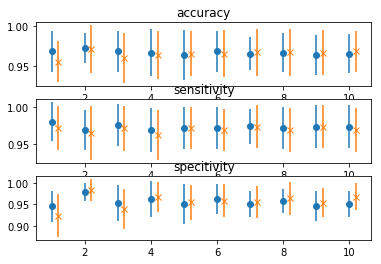

In [7]:
#PART2
random.shuffle(attr_target_list)
#print(attr_target_list)
print("after suffle:")
print("size of data point:",len(attr_target_list))
print("size of attribute:",len(attr_target_list[0]))

# for p=1
accuracy = []
sensitivity = []
specitivity = []
# for p=2
accuracy2 = []
sensitivity2 = []
specitivity2 = []

total_size = len(attr_target_list)
for i in range(10):# 10-fold
    print(i," testing data:[",int(total_size*i/10),",",int(total_size*(i+1)/10),"]")
    testing_data = attr_target_list[int(total_size*i/10):int(total_size*(i+1)/10)]
    training_data = attr_target_list[0:int(total_size*i/10)]
    training_data.extend(attr_target_list[int(total_size*(i+1)/10):])
    p=1
    Cross_validation(testing_data, training_data, accuracy, sensitivity, specitivity, p)
    p=2
    Cross_validation(testing_data, training_data, accuracy2, sensitivity2, specitivity2, p)

X = np.arange(1,11,1)
# little shift to avoid two error bar overlap
X2 = np.arange(1.2,11,1)
s = ['']*10
sA = ['']*10
# subplot(3, 1, 1):accuracy
ax = plt.subplot(3, 1, 1)
ax.set_title("accuracy")
for i in range(10):
    s[i] = mean(accuracy[i::10])
    sA[i] = np.std(accuracy[i::10])
print("p1 accuracy mean:",['%.2f'% elem for elem in s ])
print("p1 accuracy sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X, s, yerr=sA, fmt='o')
for i in range(10):
    s[i] = mean(accuracy2[i::10])
    sA[i] = np.std(accuracy2[i::10])
print("p2 accuracy mean:",['%.2f'% elem for elem in s ])
print("p2 accuracy sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X2, s, yerr=sA, fmt='x')

# subplot(3, 1, 2):sensitivity
ax = plt.subplot(3, 1, 2)
ax.set_title("sensitivity")
for i in range(10):
    s[i] = mean(sensitivity[i::10])
    sA[i] = np.std(sensitivity[i::10])
print("p1 sensitivity mean:",['%.2f'% elem for elem in s ])
print("p1 sensitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X, s, yerr=sA, fmt='o')
for i in range(10):
    s[i] = mean(sensitivity2[i::10])
    sA[i] = np.std(sensitivity2[i::10])
print("p2 sensitivity mean:",['%.2f'% elem for elem in s ])
print("p2 sensitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X2, s, yerr=sA, fmt='x')

# subplot(3, 1, 3):specitivity
ax = plt.subplot(3, 1, 3)
ax.set_title("specitivity")
for i in range(10):
    s[i] = mean(specitivity[i::10])
    sA[i] = np.std(specitivity[i::10])
print("p1 specitivity mean:",['%.2f'% elem for elem in s ])
print("p1 specitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X, s, yerr=sA, fmt='o')
for i in range(10):
    s[i] = mean(specitivity2[i::10])
    sA[i] = np.std(specitivity2[i::10])
print("p2 specitivity mean:",['%.2f'% elem for elem in s ])
print("p2 specitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X2, s, yerr=sA, fmt='x')

plt.show()